In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Analysis and Data Exploring


In [490]:
df= pd.read_csv('/content/drive/MyDrive/FinalAssessment/Telecust1.csv')

# Displaying the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Dataset description
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# List of attributes (columns)
columns = df.columns.tolist()
print("\nList of Attributes (Columns):")
print(columns)

Dataset Preview:
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1       A  
4       4       C  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   in

##Data Cleaning

In [491]:
df = df.drop(columns=["AppleID"], errors='ignore')

df["custcat"] = df["custcat"].map({"A": 1, "B": 0, "C": 2, "D":3 })

print(df.dtypes)  # Should show 'Acidity' as float64
print(df.head())

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Checking for duplicate rows|
duplicate_vlaues = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_vlaues}")

df= df.drop_duplicates()

# Checking for duplicate rows
duplicate_vlaues = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_vlaues}")


region     int64
tenure     int64
age        int64
income     int64
marital    int64
address    int64
ed         int64
employ     int64
retire     int64
gender     int64
reside     int64
custcat    int64
dtype: object
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside  custcat  
0       2        1  
1       6        3  
2       2        2  
3       1        1  
4       4        2  

Missing Values in Each Column:
region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0


#Exploring the Data through Visualization


<ipython-input-492-25080ee20d45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="custcat", palette="Set1")


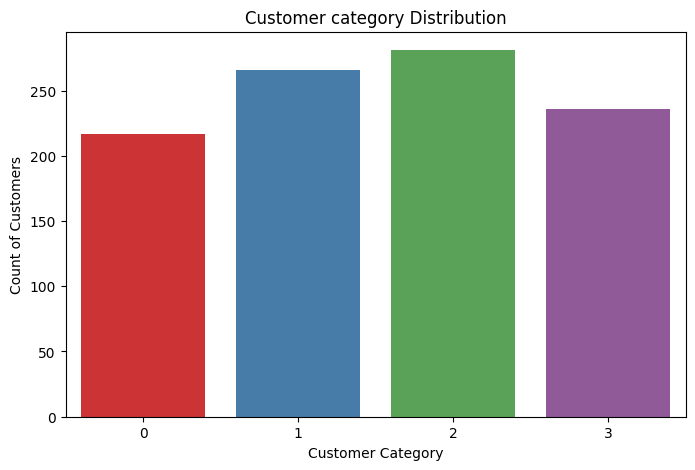

In [492]:
# Visualizing the distribution of PlacementStatus
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="custcat", palette="Set1")
plt.title("Customer category Distribution")
plt.xlabel("Customer Category")
plt.ylabel("Count of Customers")
plt.show()


### Category of income

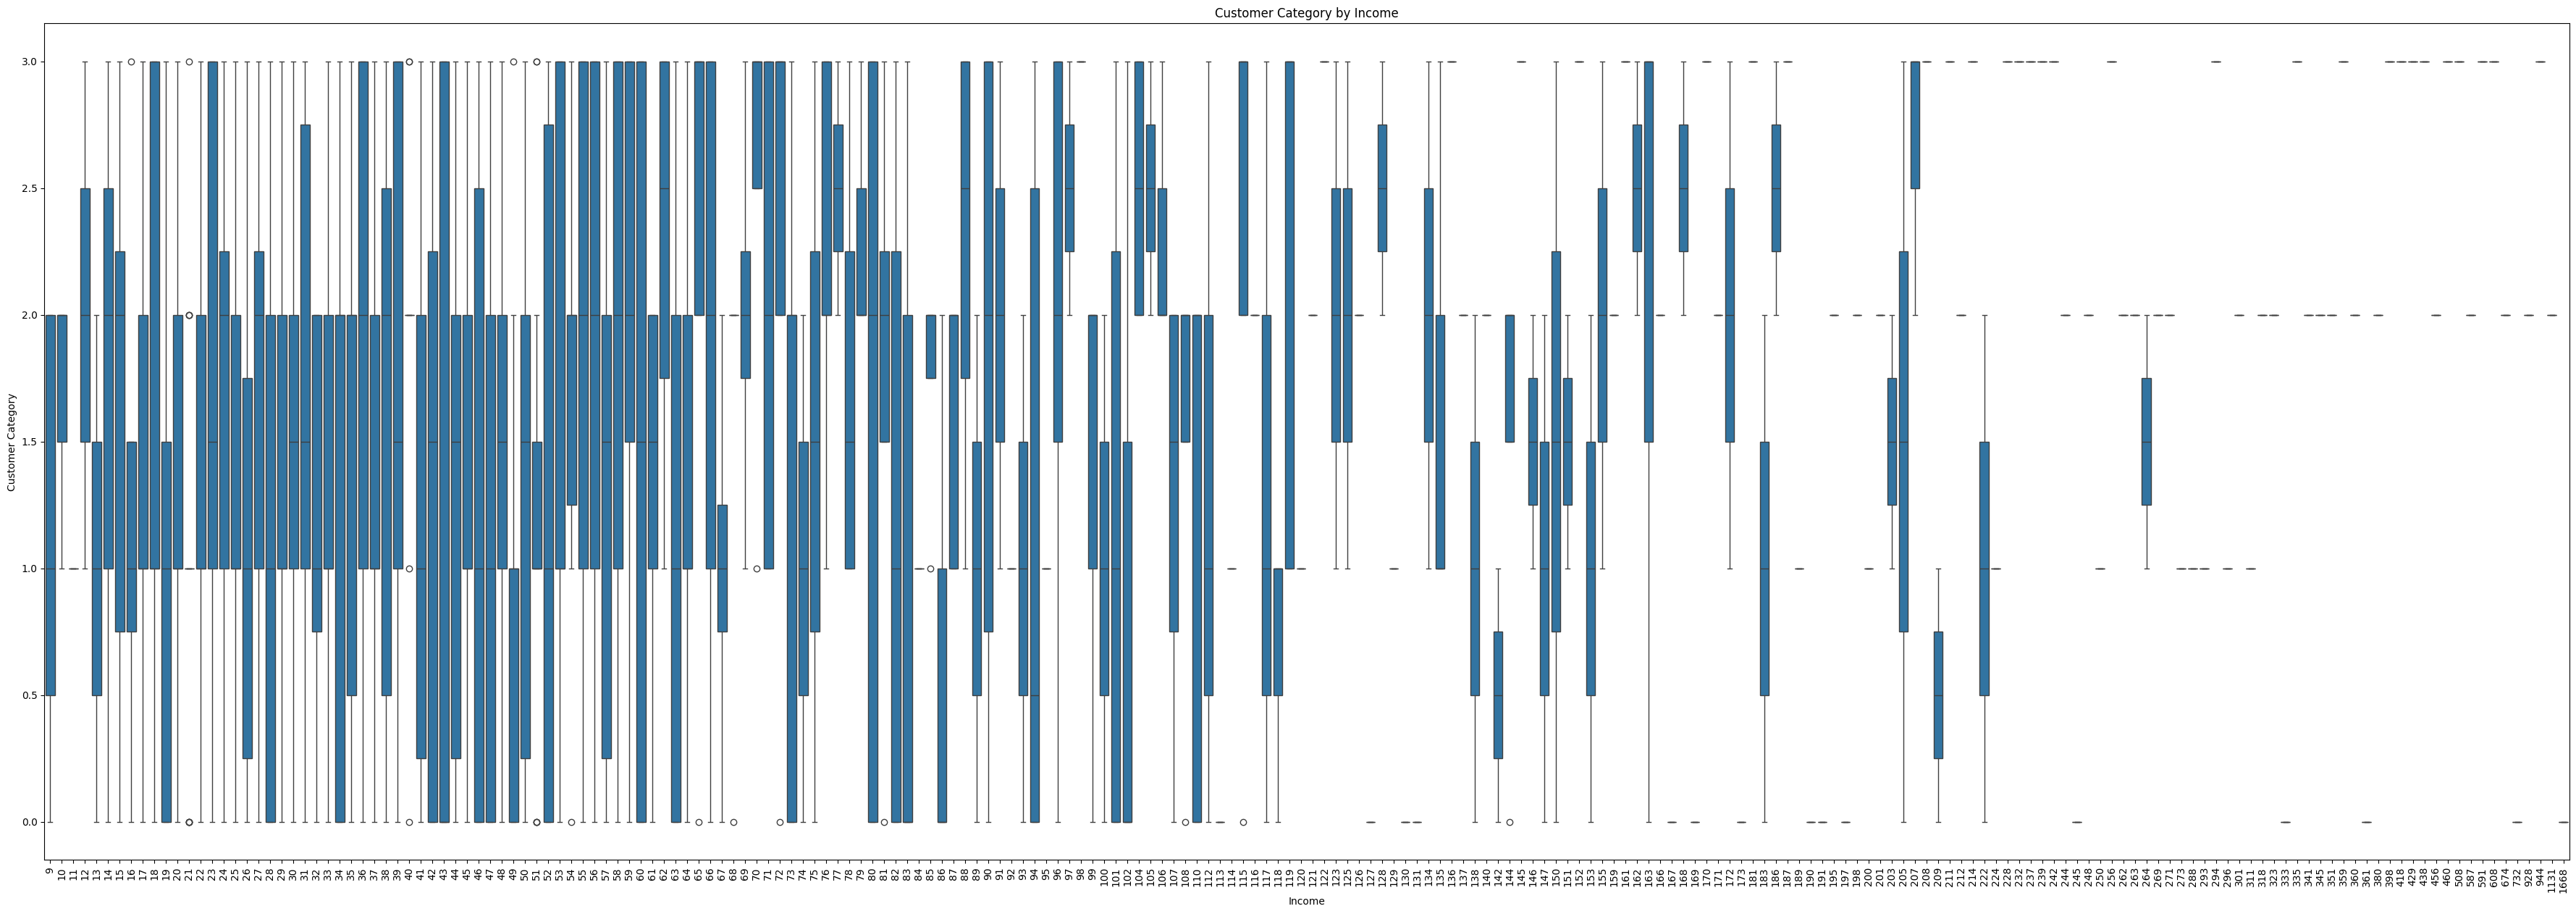

In [493]:
plt.figure(figsize=(45, 15))
sns.boxplot(x='income', y='custcat', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel("Income")
plt.ylabel("Customer Category")
plt.title("Customer Category by Income")
plt.show()



### Custcat vs frequency


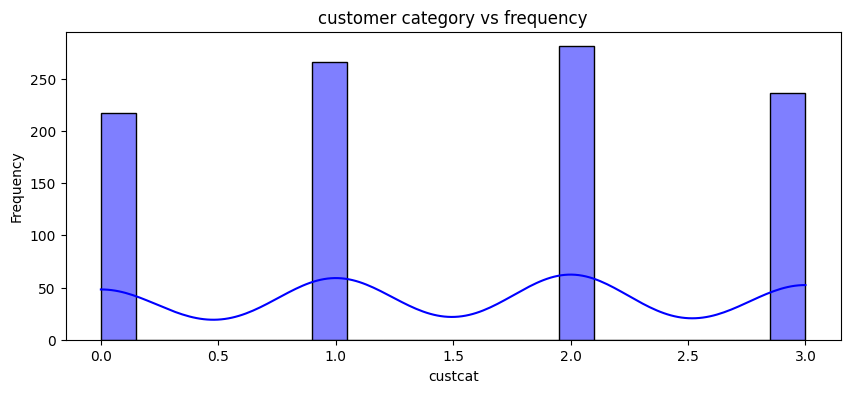

In [494]:
plt.figure(figsize=(10, 4))
sns.histplot(df['custcat'], bins=20, kde=True, color="blue")
plt.xlabel("custcat")
plt.ylabel("Frequency")
plt.title("customer category vs frequency")
plt.show()



###Build a model from scratch

In [495]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(columns=["custcat"])
Y = df["custcat"]

if X.shape[0] == Y.shape[0]:
  print("Continue Further")
else:
  print("X and Y are not created correctly")

Continue Further


In [496]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# x_train = np.array(x_train, dtype=float)
# x_test = np.array(x_test, dtype=float)
# y_train = np.array(y_train, dtype=float)
# y_test = np.array(y_test, dtype=float)
print(y_test)
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
if x_train.shape[0] == y_train.shape[0]:
  print("Continue Further")
else:
  print("x_train and y_train are not created correctly")

528    3
396    2
512    0
87     3
468    0
      ..
657    3
316    2
259    3
474    3
23     1
Name: custcat, Length: 300, dtype: int64
Shape of X_train: (700, 11)
Shape of X_test: (300, 11)
Shape of y_train: (700,)
Shape of y_test: (300,)
Continue Further


In [497]:

def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np

  y = 1 / (1 + np.exp(-x))
  return y

In [498]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
  return loss

In [499]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = sum(log_loss(y_true, y_pred))
    cost = loss_vec/n
    return cost

In [500]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = X.dot(w) + b
    y_pred = 1/(1+np.exp(-z))
    cost = cost_function(y, y_pred)
    return cost

In [501]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_pred = logistic_function(np.dot(X, w) + b)
    grad_w = (1/m)* X.T.dot(y_pred - y)
    grad_b = (1/m)* np.sum(y_pred - y)
    return grad_w, grad_b

In [502]:
# Gradient descent algorithm for logistic regression
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False):
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    from tqdm.contrib import itertools
    import math
    import tqdm
    from time import sleep
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w += -alpha * grad_w
        b += -alpha * grad_b
        cost =  costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])


    return w, b, cost_history, params_history



###Scaling the features

In [503]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [504]:
# Initialize parameters
n_features = x_train_scaled.shape[1]
w = np.zeros(n_features)  # Initialize weights as zeros
b = 0  # Initialize bias as 0

In [505]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
w_optimized, b_optimized, cost_history, params_history = gradient_descent(
    x_train_scaled, y_train, w, b, learning_rate, num_iterations
)

# Print final parameters
print("Optimized weights (w):", w_optimized)
print("Optimized bias (b):", b_optimized)

  0%|          | 0/1000 [00:00<?, ?it/s]

Optimized weights (w): [ 0.08471486 -0.40949682 -0.09490166  0.69616931  0.11770811  0.02919211
  0.79852209  0.37737643  0.21243831 -0.45594593  0.69498273]
Optimized bias (b): 6.483084062865268


In [506]:
# Make predictions on the test set
y_pred_prob = logistic_function(np.dot(x_test_scaled, w_optimized) + b_optimized)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.29333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.29      1.00      0.45        88
           2       0.00      0.00      0.00        82
           3       0.00      0.00      0.00        64

    accuracy                           0.29       300
   macro avg       0.07      0.25      0.11       300
weighted avg       0.09      0.29      0.13       300

Confusion Matrix:
[[ 0 66  0  0]
 [ 0 88  0  0]
 [ 0 82  0  0]
 [ 0 64  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


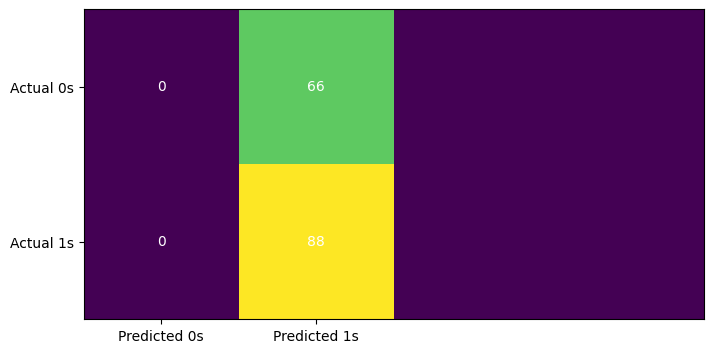

In [507]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

##Build a primary model

In [508]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Initialize Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred_tree = tree_model.predict(x_test_scaled)

# Model evaluation
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tree)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_tree)}")
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

Decision Tree Evaluation:
Accuracy: 0.31333333333333335
Confusion Matrix:
[[20 15 18 13]
 [10 33 23 22]
 [19 23 28 12]
 [23 15 13 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.30      0.29        66
           1       0.38      0.38      0.38        88
           2       0.34      0.34      0.34        82
           3       0.22      0.20      0.21        64

    accuracy                           0.31       300
   macro avg       0.30      0.31      0.31       300
weighted avg       0.31      0.31      0.31       300



In [509]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(x_test_scaled)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest F1 Score: 0.3465
Confusion Matrix:
[[15 10 24 17]
 [ 7 44 17 20]
 [ 8 31 27 16]
 [19 12 14 19]]
Accuracy: 0.35
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.23      0.26        66
           1       0.45      0.50      0.48        88
           2       0.33      0.33      0.33        82
           3       0.26      0.30      0.28        64

    accuracy                           0.35       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.35      0.35      0.35       300



In [510]:
from sklearn.model_selection import GridSearchCV

tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring="accuracy")
grid_tree.fit(x_train_scaled, y_train)

# Best hyperparameters for Decision Tree
print("\nBest Parameters for Decision Tree:")
print(grid_tree.best_params_)

# Hyperparameter tuning for Random Forest
rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy")
grid_rf.fit(x_train_scaled, y_train)

# Best hyperparameters for Random Forest
print("\nBest Parameters for Random Forest:")
print(grid_rf.best_params_)



Best Parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [511]:
from sklearn.feature_selection import RFE

tree_clf = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=tree_clf, n_features_to_select=6)
rfe.fit(x_train_scaled, y_train)

selected_features_tree = X.columns[rfe.support_]
print("Selected Features for Decision Tree:", selected_features_tree)
print(f"Selected Features Mask: {rfe.support_}")
print(f"Feature Ranking: {rfe.ranking_}")

Selected Features for Decision Tree: Index(['tenure', 'age', 'income', 'address', 'ed', 'employ'], dtype='object')
Selected Features Mask: [False  True  True  True False  True  True  True False False False]
Feature Ranking: [2 1 1 1 5 1 1 1 6 4 3]


In [512]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)  # Train the model

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort features by importance
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

#Selecting top 6 features
top_features = feature_importances[:6].index
print("Selected Features:", top_features)



Feature Importances:
 tenure     0.165590
income     0.156403
age        0.138568
employ     0.137701
address    0.130936
ed         0.093199
reside     0.064831
region     0.053063
gender     0.029640
marital    0.025060
retire     0.005009
dtype: float64
Selected Features: Index(['tenure', 'income', 'age', 'employ', 'address', 'ed'], dtype='object')


In [513]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=X.columns)

# Select the important features from Task 5

selected_features_rf = ['tenure', 'income', 'age', 'address', 'employ', 'ed']

# Subset the dataset with selected features
x_train_rf = x_train_scaled_df[selected_features_rf]
x_test_rf = x_test_scaled_df[selected_features_rf]

# Rebuild Random Forest model with optimal hyperparameters
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(x_train_rf, y_train)
y_pred_rf = rf.predict(x_test_rf)

# Evaluate Random Forest
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\nRandom Forest Evaluation:")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")



Random Forest Evaluation:
Random Forest F1 Score: 0.3987
Confusion Matrix:
[[25 10 17 14]
 [ 8 44 19 17]
 [12 31 26 13]
 [15  9 15 25]]
Accuracy: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.38      0.40        66
           1       0.47      0.50      0.48        88
           2       0.34      0.32      0.33        82
           3       0.36      0.39      0.38        64

    accuracy                           0.40       300
   macro avg       0.40      0.40      0.40       300
weighted avg       0.40      0.40      0.40       300

